## K-Means Clustering in Particle-Id Plot in Nuclear Physics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import ROOT
from ROOT import gStyle
from ROOT import gPad
from ROOT import TF1, TF2, TFile, TSpectrum
import uproot3 as uproot

Welcome to JupyROOT 6.20/00


### Importing the data file, deleting useless stuffs and scaling using MinMaxScaler

In [2]:
InFile = uproot.open("Input File/Run0100.root")
InFile.keys()
InTree = InFile["data"]
InTree.keys()
InTree.arrays(["icdE", "icE","tdcIC"])
df = InTree.pandas.df(["icdE*", "icE*", "tdcIC*"])
df
indexNames = df[ df['tdcIC'] == 0 ].index #Deleting entries with tdcIC == 0
df.drop(indexNames , inplace=True)
indexNames = df[ df['tdcIC'] < 600 ].index #Deleting entries with tdcIC < 600
df.drop(indexNames , inplace=True)
indexNames = df[ df['tdcIC'] > 1100 ].index #Deleting entries with tdcIC > 1100
df.drop(indexNames , inplace=True)
indexNames = df[ df['icdE'] == 0 ].index #Deleting entries with icdE = 0
df.drop(indexNames , inplace=True)
indexNames = df[ df['icdE'] < 1000 ].index #Deleting entries with icdE < 1000
df.drop(indexNames , inplace=True)
indexNames = df[ df['icdE'] > 1600 ].index #Deleting entries with icdE > 1600
df.drop(indexNames , inplace=True)
indexNames = df[ df['icE'] == 0 ].index #Deleting entries with icE = 0
df.drop(indexNames , inplace=True)
indexNames = df[ df['icE'] < 1150 ].index #Deleting entries with icE < 1150
df.drop(indexNames , inplace=True)
indexNames = df[ df['icE'] > 1600 ].index #Deleting entries with icE > 1600
df.drop(indexNames , inplace=True)
df.head()

,icdE,icE,tdcIC
entry,,,
1,1241,1327,1049
4,1374,1352,648
7,1244,1367,756
14,1324,1346,648
20,1373,1211,647


In [3]:
#Scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['icdE']])
df['icdE'] = scaler.transform(df[['icdE']])
scaler.fit(df[['icE']])
df['icE'] = scaler.transform(df[['icE']])
df.head()

,icdE,icE,tdcIC
entry,,,
1,0.401667,0.393333,1049
4,0.623333,0.448889,648
7,0.406667,0.482222,756
14,0.540000,0.435556,648
20,0.621667,0.135556,647


Text(0, 0.5, 'icdE')

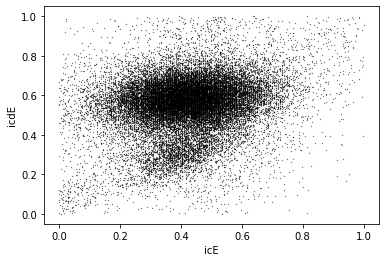

In [4]:
plt.scatter(df['icE'],df['icdE'],s=0.05, c='k', marker='o')
plt.xlabel('icE')
plt.ylabel('icdE')

### Elbow method to optimize the number of clusters 

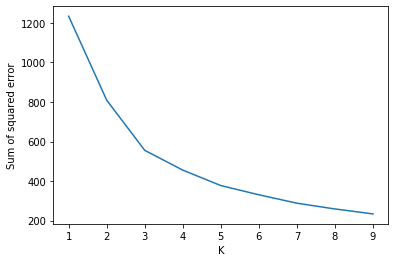

In [6]:
SumSqErr = []
k_values = range(1,10)
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(df[['icE','icdE']])
    SumSqErr.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_values,SumSqErr)    

In [9]:
init = np.array([[0.4,0.3],[0.35,0.6],[0.55,0.6]],np.float64)
km = KMeans(n_clusters=3,init=init,n_init=1)
y_predicted = km.fit_predict(df[['icE','icdE']])
df['cluster'] = y_predicted

Text(0, 0.5, 'icdE')

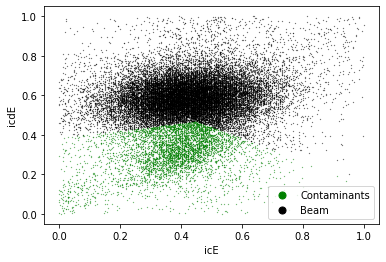

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.icE,df1['icdE'],color='green',s=0.05,label='Contaminants')
plt.scatter(df2.icE,df2['icdE'],color='black',s=0.05,label='Beam')
plt.scatter(df3.icE,df3['icdE'],color='black',s=0.05)
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
plt.xlabel('icE')
plt.ylabel('icdE')